In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from solvers import util


In [3]:
drones_3_8_combined= pd.read_excel('ADMM_mpc_3_to_8_agents.xlsm', sheet_name='Sheet1')

In [4]:
drones_3_8_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [5]:
drones_3_8_combined.columns = ['i_tria','n_agents','t','converged','obj_trj','T','dt','radius','SOVA_admm','t_solve_avg','t_solve_std','MAX_ITER','dist_to_goal']

In [6]:
drones_3_8_combined = drones_3_8_combined.loc[drones_3_8_combined['converged']==True]

In [7]:
drones_3_8_combined = drones_3_8_combined.replace(to_replace='None', value=np.nan).dropna()

In [8]:
drones_3_8_combined = drones_3_8_combined.dropna()

In [9]:
drones_3_8_combined.columns

Index(['i_tria', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       'SOVA_admm', 't_solve_avg', 't_solve_std', 'MAX_ITER', 'dist_to_goal'],
      dtype='object')

In [10]:
drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']
# drones_3_8_combined['normalized_t_solve'] = np.log(drones_3_8_combined['t_solve_avg'])

In [11]:
drones_3_8_combined['normalized_std'] = drones_3_8_combined['t_solve_std']/drones_3_8_combined['obj_trj']

In [12]:
# plt.figure(dpi=150)
# sns.boxplot(data=drones_3_8_combined, x="n_agents", y="normalized_t_solve", hue='SOVA_admm', palette=["m", "g"], showfliers=False,linewidth=0.8)
# legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
# ax = plt.gca()
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('m')
# leg.legendHandles[1].set_color('g')
# plt.ylabel('Normalized Average Computation Time');
# plt.xlabel('Number of Agents');
# plt.savefig('results/ADMM_avg_computation_time.png')

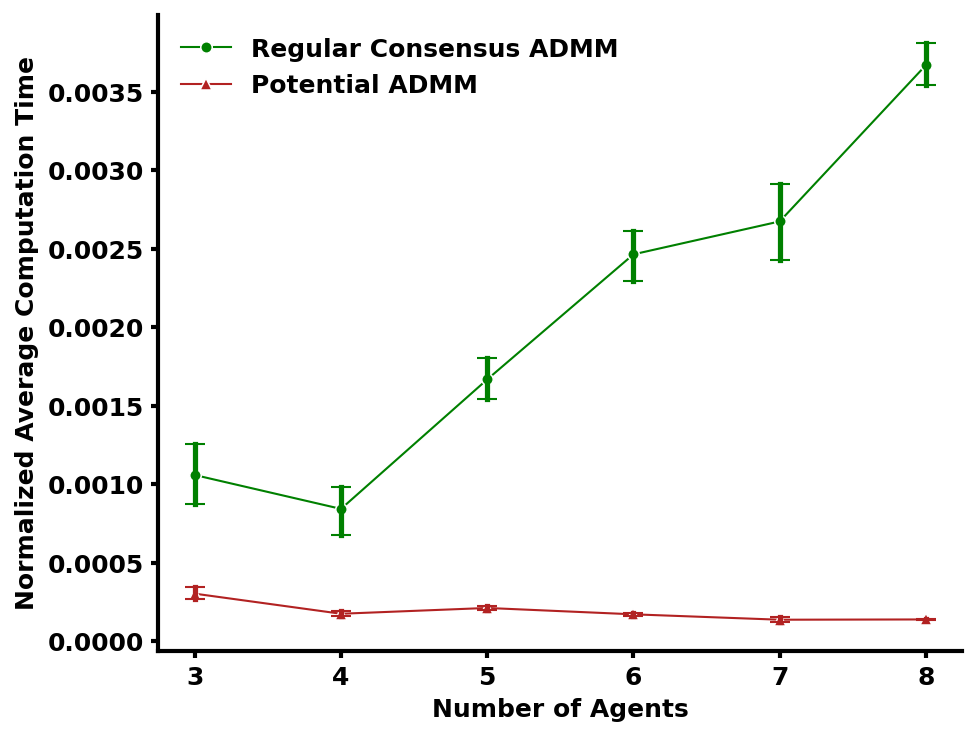

In [13]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=drones_3_8_combined, x="n_agents", y="normalized_t_solve", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=['o','^'], markersize=5.5,palette=["green", "firebrick"], err_style='bars', err_kws = err_kws)

plt.ylabel('Normalized Average Computation Time');
plt.xlabel('Number of Agents');

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')

plt.legend(labels=['Regular Consensus ADMM','Potential ADMM'],frameon=False,prop={'weight':'bold','size':12})

plt.savefig('results/ADMM_avg_computation_time.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


In [14]:
# plt.figure(dpi=150)
# sns.boxplot(data=drones_3_8_combined, x="n_agents", y="normalized_std", hue='SOVA_admm', palette=["m", "g"], showfliers=False,linewidth=0.8)
# legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
# ax = plt.gca()
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('m')
# leg.legendHandles[1].set_color('g')
# plt.ylabel('Normalized Standard Deviations of Computation Times');
# plt.xlabel('Number of Agents');
# plt.savefig('results/ADMM_avg_std_time.png')

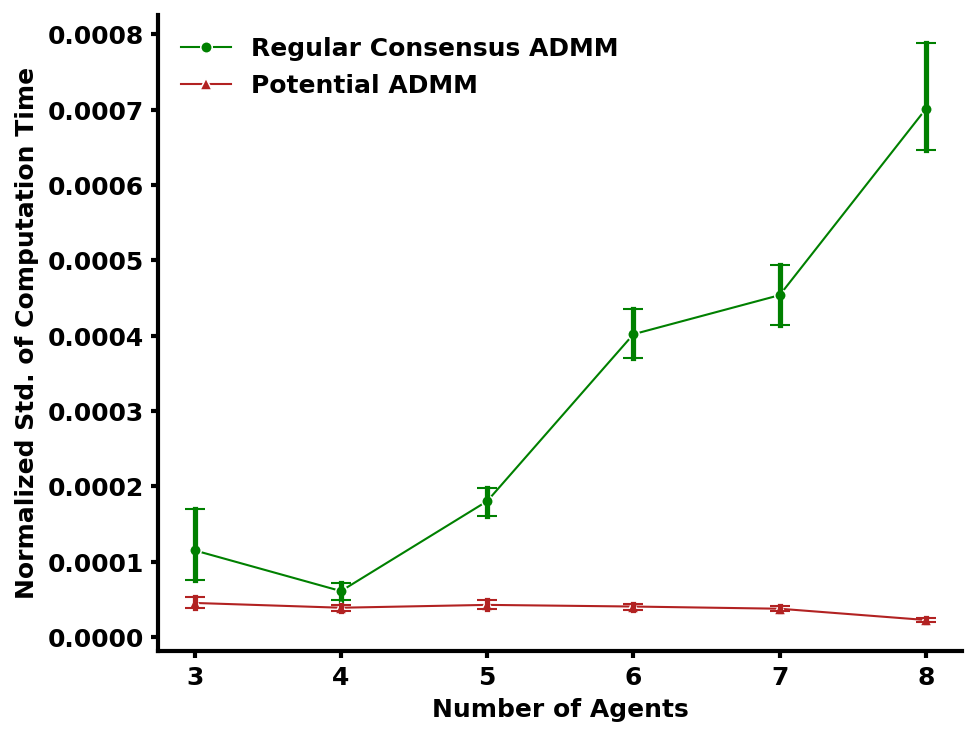

In [15]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=drones_3_8_combined, x="n_agents", y="normalized_std", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=['o','^'], markersize=5.5,palette=["green", "firebrick"], err_style='bars', err_kws = err_kws)

plt.ylabel('Normalized Std. of Computation Time');
plt.xlabel('Number of Agents');

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')

plt.legend(labels=['Regular Consensus ADMM','Potential ADMM'],frameon=False,prop={'weight':'bold','size':12})

plt.savefig('results/ADMM_std_computation_time.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


In [16]:
df = drones_3_8_combined

In [17]:
df_try = df.replace(to_replace='None', value=np.nan).dropna()

In [18]:
df_try = df.replace(to_replace=np.inf, value=np.nan).dropna()

In [20]:
optimality_df = df_try.groupby(['SOVA_admm','n_agents']).agg({'obj_trj': ['mean', 'std']})

In [21]:
optimality_df

obj_trj             
                           mean          std
SOVA_admm n_agents                          
False     3          899.083688   417.969486
          4         1684.875825  1160.082750
          5         1164.624040   274.274095
          6         1483.939727   461.265009
          7         1862.009299   444.752947
          8         1850.461584   215.692009
True      3         1167.626560   470.960979
          4         2035.076847   904.462162
          5         1422.572759   392.119616
          6         1793.193517   533.950584
          7         2419.955387   769.380660
          8         1882.405326   235.519064

In [22]:
optimality_df.columns=['mean_value','std_value']

In [23]:
optimality_df = optimality_df.reset_index()

In [24]:
optimality_df

,SOVA_admm,n_agents,mean_value,std_value
0,False,3,899.083688,417.969486
1,False,4,1684.875825,1160.082750
2,False,5,1164.624040,274.274095
3,False,6,1483.939727,461.265009
4,False,7,1862.009299,444.752947
5,False,8,1850.461584,215.692009
6,True,3,1167.626560,470.960979
7,True,4,2035.076847,904.462162
8,True,5,1422.572759,392.119616
9,True,6,1793.193517,533.950584


In [25]:
decentralized_admm = optimality_df.loc[optimality_df['SOVA_admm']==True]

In [26]:
centralized_admm= optimality_df.loc[optimality_df['SOVA_admm']==False]

In [27]:
centralized_admm

,SOVA_admm,n_agents,mean_value,std_value
0,False,3,899.083688,417.969486
1,False,4,1684.875825,1160.082750
2,False,5,1164.624040,274.274095
3,False,6,1483.939727,461.265009
4,False,7,1862.009299,444.752947
5,False,8,1850.461584,215.692009


In [28]:
decentralized_admm

,SOVA_admm,n_agents,mean_value,std_value
6,True,3,1167.626560,470.960979
7,True,4,2035.076847,904.462162
8,True,5,1422.572759,392.119616
9,True,6,1793.193517,533.950584
10,True,7,2419.955387,769.380660
11,True,8,1882.405326,235.519064


In [29]:
relative_gap = np.abs(decentralized_admm['mean_value'].values - centralized_admm['mean_value'].values)/centralized_admm['mean_value'].values
relative_gap

array([0.299, 0.208, 0.221, 0.208, 0.3  , 0.017])

In [38]:
data = {"n_agents":[3, 4, 5, 6, 7, 8],'relative_gap':relative_gap}

In [39]:
relative_gap_df = pd.DataFrame(data)

In [40]:
relative_gap_df

,n_agents,relative_gap
0,3,0.298685
1,4,0.207850
2,5,0.221487
3,6,0.208401
4,7,0.299647
5,8,0.017263


In [ ]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=drones_3_8_combined, x="n_agents", y="normalized_std", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=['o','^'], markersize=5.5,palette=["green", "firebrick"], err_style='bars', err_kws = err_kws)

plt.ylabel('Normalized Std. of Computation Time');
plt.xlabel('Number of Agents');

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')

plt.legend(labels=['Regular Consensus ADMM','Potential ADMM'],frameon=False,prop={'weight':'bold','size':12})

plt.savefig('results/ADMM_std_computation_time.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())

In [215]:
success_count=df.groupby(['SOVA_admm','n_agents'])['converged'].value_counts()

In [216]:
success_count

SOVA_admm  n_agents  converged
False      3         1.0          18
           4         1.0          15
           5         1.0          23
           6         1.0          23
           7         1.0          14
           8         1.0          30
True       3         1.0          24
           4         1.0          24
           5         1.0          28
           6         1.0          26
           7         1.0          20
           8         1.0          30
Name: count, dtype: int64

In [217]:
success_count_df = pd.DataFrame(success_count)

In [218]:
success_count_df=success_count_df.rename(columns={'converged':'count'})

In [219]:
success_count_df = success_count_df.reset_index()

In [226]:
success_count_df

,SOVA_admm,n_agents,converged,count
0,False,3,1.0,18
1,False,4,1.0,15
2,False,5,1.0,23
3,False,6,1.0,23
4,False,7,1.0,14
5,False,8,1.0,30
6,True,3,1.0,24
7,True,4,1.0,24
8,True,5,1.0,28
9,True,6,1.0,26


In [227]:
centralized = success_count_df.loc[success_count_df['SOVA_admm']==False]

In [222]:
distributed = success_count_df.loc[success_count_df['SOVA_admm']==True]

In [224]:
centralized.loc[centralized['converged']==True]['count'].sum()/180 #probability of convergence out of all trials

0.6833333333333333

In [225]:
distributed.loc[distributed['converged']==True]['count'].sum()/180

0.8444444444444444

### Comparison w/ DP-ilQR:

In [228]:
dpilqr_3_to_8_agents = pd.read_excel('dpilqr_3_8_agents.xlsm', sheet_name='Sheet1')

In [229]:
dpilqr_3_to_8_agents.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [230]:
dpilqr_3_to_8_agents = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['converged']==True]

In [231]:
distributed_results = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['centralized']==False]

In [265]:
distributed_results

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."
...,...,...,...,...,...,...,...,...,...
175,8,25,False,2592.796278,8,0.1,True,0.132905,"[0.04434154194409573, 0.03013982249851408, 0.0..."
176,8,26,False,1978.219293,8,0.1,True,0.052027,"[0.038369301166101946, 0.0759788920378947, 0.0..."
177,8,27,False,2455.109000,8,0.1,True,0.102513,"[0.008364240592466331, 0.06278290647887015, 0...."
178,8,28,False,1915.307486,8,0.1,True,0.084032,"[0.003785950916613656, 0.048239522293685624, 0..."


In [266]:
dpilqr_comparison_df = distributed_results.groupby(['n_agents']).agg({'J': ['mean', 'std']})

In [267]:
dpilqr_comparison_df

J              
                 mean           std
n_agents                           
3          727.734362    232.753006
4         1513.065714    692.389193
5         1267.944795    235.211356
6         2541.394736   4398.417334
7         3620.403943   5138.362924
8         5839.563240  10433.686957

In [268]:
dpilqr_comparison_df.columns=['mean','std']

In [269]:
dpilqr_comparison_df = dpilqr_comparison_df.reset_index()

In [270]:
dpilqr_comparison_df

,n_agents,mean,std
0,3,727.734362,232.753006
1,4,1513.065714,692.389193
2,5,1267.944795,235.211356
3,6,2541.394736,4398.417334
4,7,3620.403943,5138.362924
5,8,5839.563240,10433.686957


In [271]:
decentralized_admm_comparison = decentralized_results_admm.drop(columns=['SOVA_admm'])

In [272]:
decentralized_admm_comparison.columns

Index(['n_agents', 'mean_value', 'std_value'], dtype='object')

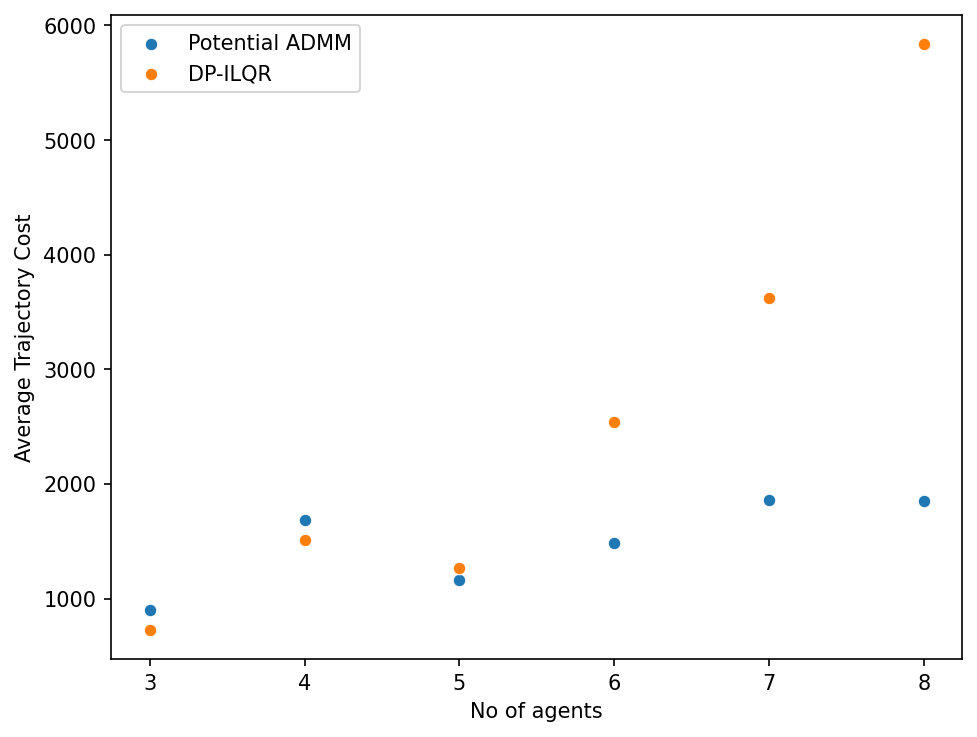

In [275]:
plt.figure(dpi=150)
sns.scatterplot(data=decentralized_admm_comparison, x=np.arange(3,9,1), y='mean_value',label='Potential ADMM')
sns.scatterplot(data=dpilqr_comparison_df, x=np.arange(3,9,1),y='mean' ,label='DP-ILQR')
plt.xlabel('No of agents')
plt.ylabel('Average Trajectory Cost')
plt.savefig('results/ADMM_vs_DPILQR.png')